In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import tqdm
from datetime import datetime
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import toad
from toad.plot import bin_plot, badrate_plot
import matplotlib
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

train_x = pd.read_csv('./data/train/feature.csv')
train_y = pd.read_csv('./data/train/label.csv')
test_x = pd.read_csv('./data/test/feature.csv')
test_y = pd.read_csv('./data/test/label.csv')

In [7]:
train = pd.merge(train_x, train_y,on='APPLICATION_ID')
test = pd.merge(test_x, test_y,on='APPLICATION_ID')

del train['APPLICATION_DATE']
del test['APPLICATION_DATE']

print(train['DEFAULT_LABEL'].value_counts())

0    71957
1     1543
Name: DEFAULT_LABEL, dtype: int64


In [11]:
# 查看数据类型
print(train.shape, test.shape) # 1000个feat 
print(train.info())

(73500, 1002) (24500, 1002)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 73500 entries, 0 to 73499
Columns: 1002 entries, APPLICATION_ID to DEFAULT_LABEL
dtypes: float64(1000), int64(1), object(1)
memory usage: 562.4+ MB
None


In [16]:
# 查看统计量
train.describe()


,v000,v001,v002,v003,v004,v005,v006,v007,v008,v009,...,v991,v992,v993,v994,v995,v996,v997,v998,v999,DEFAULT_LABEL
count,34382.000000,7914.000000,1972.000000,49036.000000,29429.000000,5336.000000,59820.000000,59405.000000,55083.000000,15921.000000,...,47907.000000,7914.000000,1972.000000,1972.000000,20934.000000,59820.000000,56503.000000,8782.000000,56503.000000,73500.000000
mean,0.006864,0.038655,0.011914,4.476189,0.343568,0.004506,12.666349,0.382645,0.852733,0.554269,...,0.196058,0.030427,0.088103,0.430966,0.041503,53.226262,0.081907,1.435884,0.005363,0.020993
std,0.093471,0.163313,0.043673,1.232573,0.263030,0.054147,34.250649,1.353781,0.255141,0.368135,...,0.285984,0.077178,0.046798,0.064664,0.063264,76.842918,0.336055,0.726202,0.075652,0.143362
min,0.000000,0.000000,0.000097,1.109035,0.000000,0.000000,0.000000,0.000000,0.004580,0.000000,...,0.000000,0.000372,0.009419,0.415888,0.000695,0.000000,0.000000,0.831777,0.000000,0.000000
25%,0.000000,0.000000,0.000587,3.975851,0.000000,0.000000,1.000000,0.000000,0.786385,0.234531,...,0.000000,0.001997,0.059655,0.415888,0.004130,16.000000,0.000000,0.831777,0.000000,0.000000
50%,0.000000,0.000000,0.001694,5.016791,0.380081,0.000000,5.000000,0.000000,0.973856,0.522873,...,0.000000,0.005081,0.079084,0.415888,0.013593,33.000000,0.000000,1.318335,0.000000,0.000000
75%,0.000000,0.000000,0.006771,5.405959,0.552951,0.000000,14.000000,0.000000,1.026399,0.858374,...,0.294118,0.019638,0.103062,0.415888,0.050965,64.000000,0.000000,1.804893,0.000000,0.000000
max,3.000000,1.498335,0.688276,5.545177,1.160430,0.855680,2153.000000,44.000000,1.039721,1.178350,...,1.000000,0.970406,0.689291,1.318335,0.485203,2187.000000,7.000000,4.146318,2.000000,1.000000


In [18]:
# 查看头尾数据
train.head(3).append(train.tail(3))

,APPLICATION_ID,v000,v001,v002,v003,v004,v005,v006,v007,v008,...,v991,v992,v993,v994,v995,v996,v997,v998,v999,DEFAULT_LABEL
0,44c4e0d49d5bf94efa446e03ecf84ba5,NaN,NaN,NaN,5.528423,NaN,NaN,10.0,0.0,0.016305,...,0.000000,NaN,NaN,NaN,NaN,41.0,0.0,NaN,0.0,0
1,993ee0eed4ad96f4f5d6dc30d56bdf94,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,8.0,0.0,NaN,0.0,0
2,a9815449c0a385ee0d53305b8cca95c6,NaN,NaN,NaN,5.062508,0.000000,NaN,7.0,0.0,1.039721,...,0.166667,NaN,NaN,NaN,NaN,22.0,0.0,NaN,0.0,0
73497,4b64b9f949949fd609008c58c19a86f4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0
73498,8dbdd0a1dc4df6983cb58e940a449fa9,NaN,NaN,0.000931,4.564210,0.288722,NaN,1.0,0.0,0.303087,...,0.285714,NaN,0.087199,0.415888,0.032204,25.0,0.0,NaN,0.0,0
73499,99cd5a6b8bb31064f68de4bc0ec19e14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [27]:
print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')
print(f'There are {test.isnull().any().sum()} columns in test dataset with missing values.')

# 查看缺失旅大于0.5的特征
have_null_fea_dict = (train.isnull().sum()/len(train)).to_dict()
fea_null_moreThanHalf = {}
for key, value in have_null_fea_dict.items():
    if value > 0.5:
        fea_null_moreThanHalf[key] = value
        
print(len(fea_null_moreThanHalf))

There are 997 columns in train dataset with missing values.
There are 997 columns in test dataset with missing values.
495


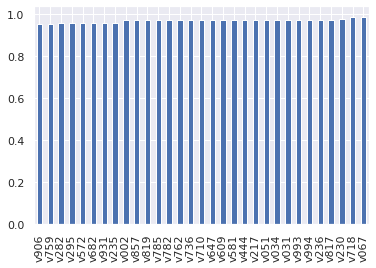

In [38]:
# nan可视化 
missing = train.isnull().sum()/len(train)
missing = missing[missing > 0.95] # 大于0.95的缺失率
missing.sort_values(inplace=True)
missing.plot.bar()
plt.savefig('nan.png')


In [41]:
one_value_fea = [col for col in train.columns if train[col].nunique() <= 1] # 单值特征

numerical_fea = list(train.select_dtypes(exclude=['object']).columns) # 数值型
category_fea = list(filter(lambda x: x not in numerical_fea,list(train.columns))) # 类别型

print("one_value_fea", one_value_fea)
print("numerical_fea size", len(numerical_fea))
print("category_fea", category_fea)

one_value_fea ['v304', 'v424', 'v669']
numerical_fea size 1001
category_fea ['APPLICATION_ID']


In [44]:
#过滤数值型类别特征
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10: # 10个类
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea
    
numerical_serial_fea, numerical_noserial_fea = get_numerical_serial_fea(train,numerical_fea)
print(len(numerical_serial_fea), len(numerical_noserial_fea))

891 110


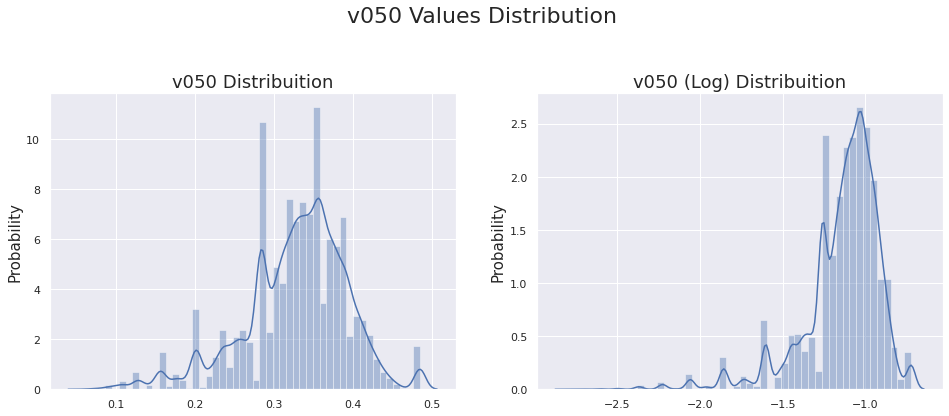

In [48]:
# 单一变量分布可视化1（包含log）
def plot_dist(df, col_name):
    #Ploting Transaction Amount Values Distribution
    plt.figure(figsize=(16,12))
    plt.suptitle(col_name + ' Values Distribution', fontsize=22)
    plt.subplot(221)
    sub_plot_1 = sns.distplot(df[col_name])
    sub_plot_1.set_title(col_name + " Distribuition", fontsize=18)
    sub_plot_1.set_xlabel("")
    sub_plot_1.set_ylabel("Probability", fontsize=15)

    plt.subplot(222)
    sub_plot_2 = sns.distplot(np.log(df[col_name]))
    sub_plot_2.set_title(col_name + " (Log) Distribuition", fontsize=18)
    sub_plot_2.set_xlabel("")
    sub_plot_2.set_ylabel("Probability", fontsize=15)

plot_dist(train, 'v050')

NaN    39118
0.0    34173
1.0      188
2.0       15
3.0        6
Name: v000, dtype: int64


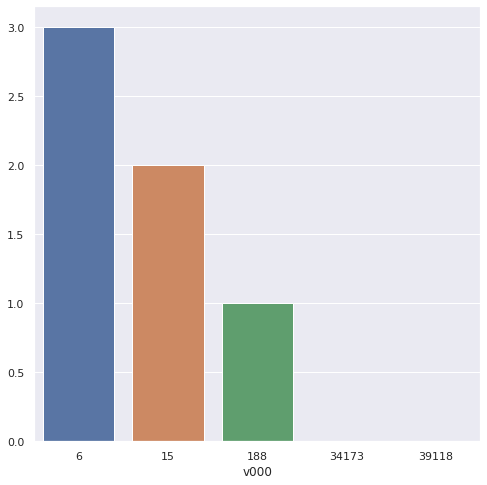

In [65]:
# 单一变量可视化
col_name = numerical_noserial_fea[0]
print(train[col_name].value_counts(dropna=False))
plt.figure(figsize=(8, 8))
sns.barplot(train[col_name].value_counts(dropna=False),
            train[col_name].value_counts(dropna=False).keys())
plt.show()

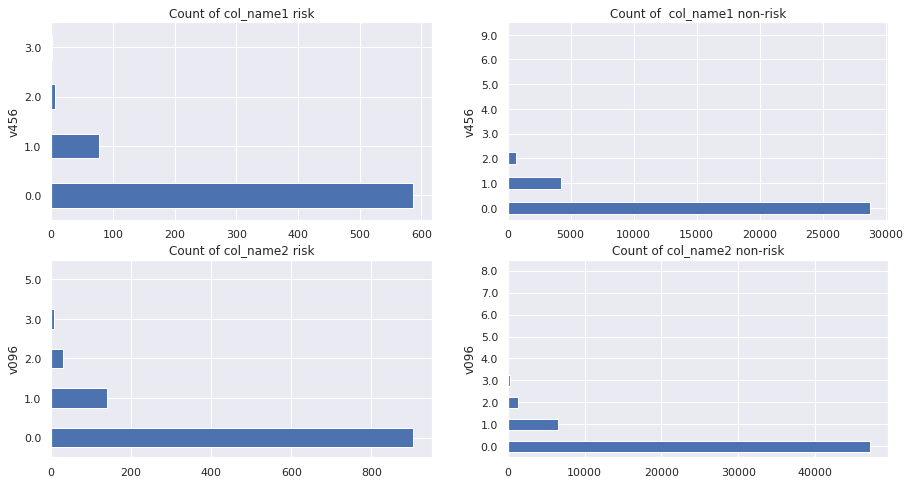

In [69]:
#根据y值不同可视化x某个特征的分布
train_loan_fr = train.loc[train['DEFAULT_LABEL'] == 1]
train_loan_nofr = train.loc[train['DEFAULT_LABEL'] == 0]

col_name1 = numerical_noserial_fea[50]
col_name2 = numerical_noserial_fea[11] # 离散型会少一点数据

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
train_loan_fr.groupby(col_name1)[col_name1].count().plot(kind='barh', ax=ax1, title='Count of col_name1 risk')
train_loan_nofr.groupby(col_name1)[col_name1].count().plot(kind='barh', ax=ax2, title='Count of  col_name1 non-risk')
train_loan_fr.groupby(col_name2)[col_name2].count().plot(kind='barh', ax=ax3, title='Count of col_name2 risk')
train_loan_nofr.groupby(col_name2)[col_name2].count().plot(kind='barh', ax=ax4, title='Count of col_name2 non-risk')
plt.show()

<AxesSubplot:title={'center':'Log v050 - Not Risk'}, ylabel='Frequency'>

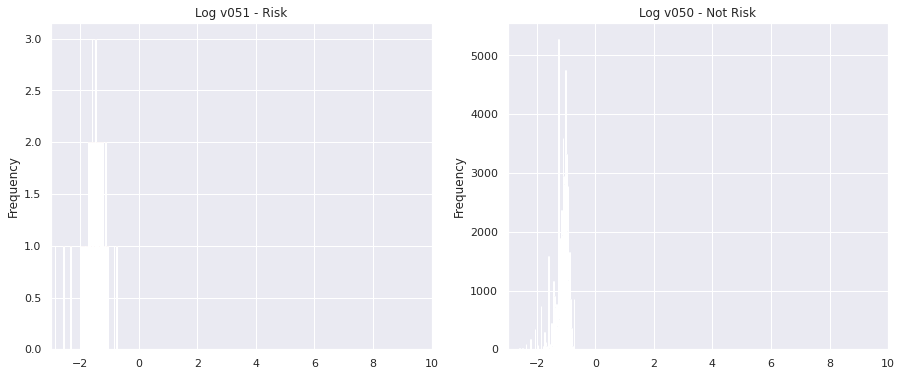

In [74]:
# 连续型在y值上的分布
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6))
train.loc[train['DEFAULT_LABEL'] == 1] \
    ['v050'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log v050 - Risk',
          color='r',
          xlim=(-3, 10),
         ax= ax1)
train.loc[train['DEFAULT_LABEL'] == 0] \
    ['v050'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log v050 - Not Risk',
          color='b',
          xlim=(-3, 10),
         ax=ax2)

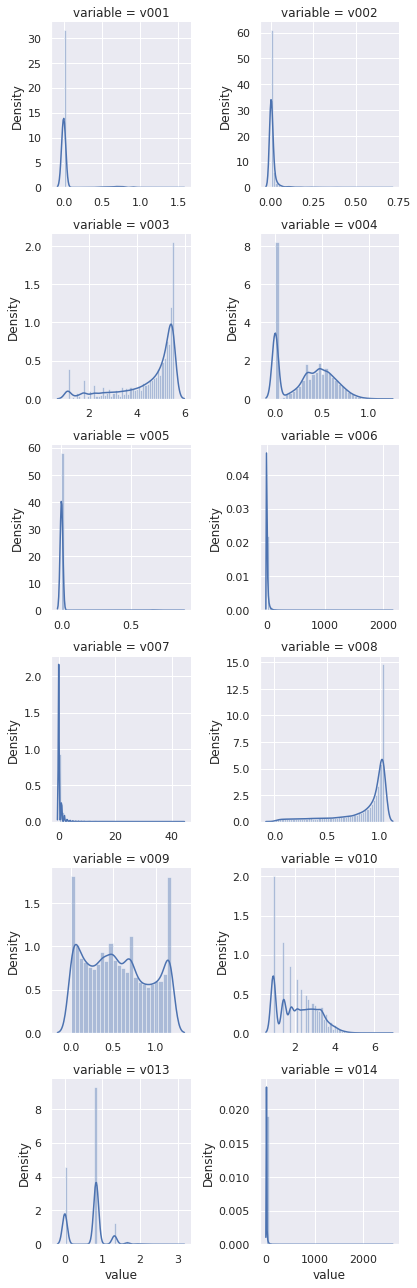

In [45]:
#连续性数值分布可视化(只取12个)
f = pd.melt(train, value_vars=numerical_serial_fea[0:12]) # 宽变长，new col名为“value”
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [50]:
#离散型数值变量

#类别型变量分析
print(train['APPLICATION_ID'].value_counts()) # 只有一个

44c4e0d49d5bf94efa446e03ecf84ba5    1
f36595613e444ef9ec360d9ee549b6a4    1
1050c190f5048943e9c654498d8a5f3f    1
59f51e09149bd486c99f184b999444df    1
46cd44884364e891acc9634a893489e1    1
                                   ..
4a4314494f9da34fefb9c464f3c0666a    1
4093c5e663b4adab48b990cf4fec8ada    1
dabcf0e9efabb54b844940b14c955916    1
99fce40814e9b8988ffd9b99cb9dcd34    1
99cd5a6b8bb31064f68de4bc0ec19e14    1
Name: APPLICATION_ID, Length: 73500, dtype: int64


In [ ]:
# 直接生成报告，可以点击
import pandas_profiling
pfr = pandas_profiling.ProfileReport(train)
pfr.to_file("./EDA.html")

## 特征工程

In [59]:
# 载入数据
train_x = pd.read_csv('./data/train/feature.csv')
train_y = pd.read_csv('./data/train/label.csv')
test_x = pd.read_csv('./data/test/feature.csv')
test_y = pd.read_csv('./data/test/label.csv')

train = pd.merge(train_x, train_y,on='APPLICATION_ID')
test = pd.merge(test_x, test_y,on='APPLICATION_ID')

del train['APPLICATION_DATE']
del test['APPLICATION_DATE']


In [60]:
# 查看缺失率大于0.5的特征
have_null_fea_dict = (train.isnull().sum()/len(train)).to_dict()
fea_null_moreThanHalf = {}
for key,value in have_null_fea_dict.items():
    if value > 0.5:
        fea_null_moreThanHalf[key] = value
        
train_fea_ = list(set(train.columns).difference(set(list(fea_null_moreThanHalf.keys())))) # 删除>0.5的特征
df_train = train[train_fea_]
df_test = test[train_fea_]
df_train.shape

(73500, 507)

In [61]:
# 缺失值填充
for column in list(df_train.columns[df_train.isnull().sum() > 0]):
    mean_val = df_train[column].mean()
    df_train[column].fillna(mean_val, inplace=True)
    df_test[column].fillna(mean_val, inplace=True)
print(df_train.shape)

(73500, 507)


In [62]:
# 查看是否有离散特征
cate_num = {}
for f in df_train.columns:
    if df_train[f].nunique() < 50:
        cate_num[f] = df_train[f].nunique()

# 离散特征
cate_feat = list(cate_num.keys())

# 删除全0特征
list_all_0 = ['v669','v424','v304']
train_fea_ = list(set(train_fea_).difference(set(list_all_0)))

# 连续特征
series_feat = list(set(train_fea_).difference(set(cate_feat)))
series_feat.remove('APPLICATION_ID')

In [ ]:
# 异常值比例计算 3sigma
def find_outliers_by_3segama(data,fea):
    data_std = np.std(data[fea])
    data_mean = np.mean(data[fea])
    outliers_cut_off = data_std * 3
    lower_rule = data_mean - outliers_cut_off
    upper_rule = data_mean + outliers_cut_off
    temp = data[fea].apply(lambda x: 0 if x > upper_rule or x < lower_rule else 1)
    
    if 0 in list(temp.value_counts().index) and len(list(temp.value_counts().index)) > 1:
        return temp.value_counts()[0]/(temp.value_counts()[0]+temp.value_counts()[1])
    else:
        return 0

def remove_None_value_elements(input_dict):
    """
    remove the element(key/value) from dict if the value is None
    :param input_dict:
    :return: new dict
    """
    if type(input_dict) is not dict:
        return None
    result = {}
    for key in input_dict:
        tmp = {}
        if input_dict[key] is not None:
            if type(input_dict[key]).__name__ == 'dict':
                tmp.update({key: remove_None_value_elements(input_dict[key])})
            else:
                tmp.update({key: input_dict[key]})
        result.update(tmp)
    return result

outlier_num = {}
df_train_ = df_train.copy()
for column in series_feat:
    outlier_num[column] = find_outliers_by_3segama(df_train_,column)
    
plt.rcParams['figure.figsize']=(12,5)
plt.bar(list(outlier_num.keys())[:15], list(outlier_num.values())[:15], color=['skyblue','lightskyblue','steelblue'])
plt.xticks(rotation=270)
plt.title('outlier ratio of features')
plt.grid(b=False)
plt.savefig('outlier.png')

In [ ]:
# 删除异常比例高于0.02的特征
outlier_fea = [x for x,v in outlier_num.items() if v >= 0.02]
if 'DEFAULT_LABEL' in outlier_fea:
    outlier_fea.remove('DEFAULT_LABEL')

train_fea_ = list(set(train_fea_).difference(set(outlier_fea)))
df_train = df_train[train_fea_]
df_test = df_test[train_fea_]
print(df_train.shape,df_test.shape)

In [ ]:
# from imblearn.over_sampling import BorderlineSMOTE
# sm = BorderlineSMOTE(random_state=42,kind="borderline-1")
# df_train_fea,df_train_l = sm.fit_resample(df_train[set(train_fea_).difference(['DEFAULT_LABEL'])], df_train['DEFAULT_LABEL'])
# df_train_fea.shape

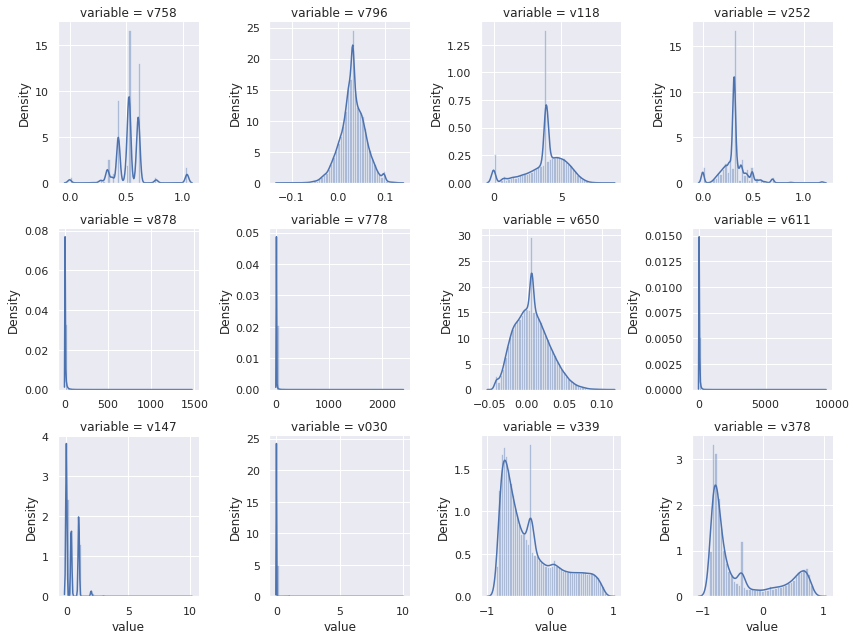

In [7]:
# 训练和测试的特征分布 前12个特征 判断训练与测试分布是否匹配
f = pd.melt(df_train,value_vars=train_fea_[:12])
t = pd.melt(df_test,value_vars=train_fea_[:12])
g1 = sns.FacetGrid(f,col="variable",col_wrap=4,sharex=False,sharey=False)
g1 = g1.map(sns.distplot,"value")
ori_colnum = df_train.shape[1]

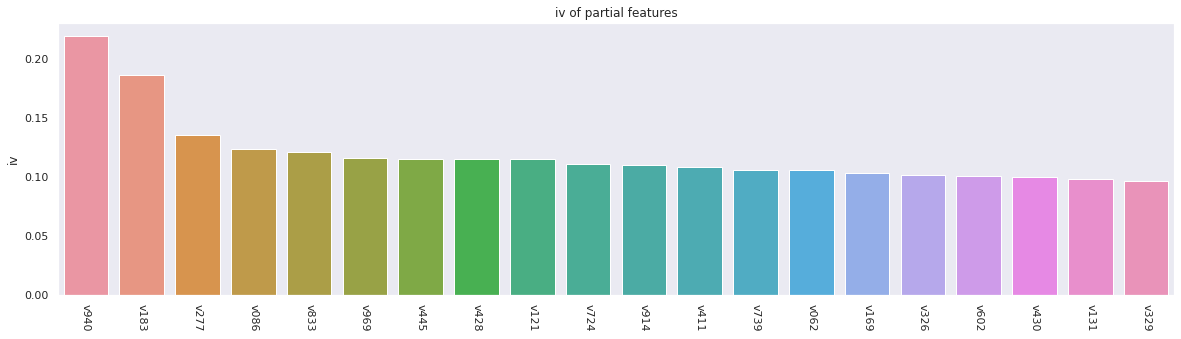

In [63]:
# 特征IV筛选
iv_info = toad.quality(df_train[set(train_fea_).difference(set(['APPLICATION_ID']))],'DEFAULT_LABEL', iv_only=True)
eff = iv_info.loc[iv_info['iv'] >=0.02]

sns.barplot(data=eff[:20],x=eff.index[:20],y='iv')
plt.rcParams['figure.figsize']=(20,5)
plt.xticks(rotation=270)
plt.title('iv of partial features')
plt.grid(b=False)  
plt.savefig('iv.png')

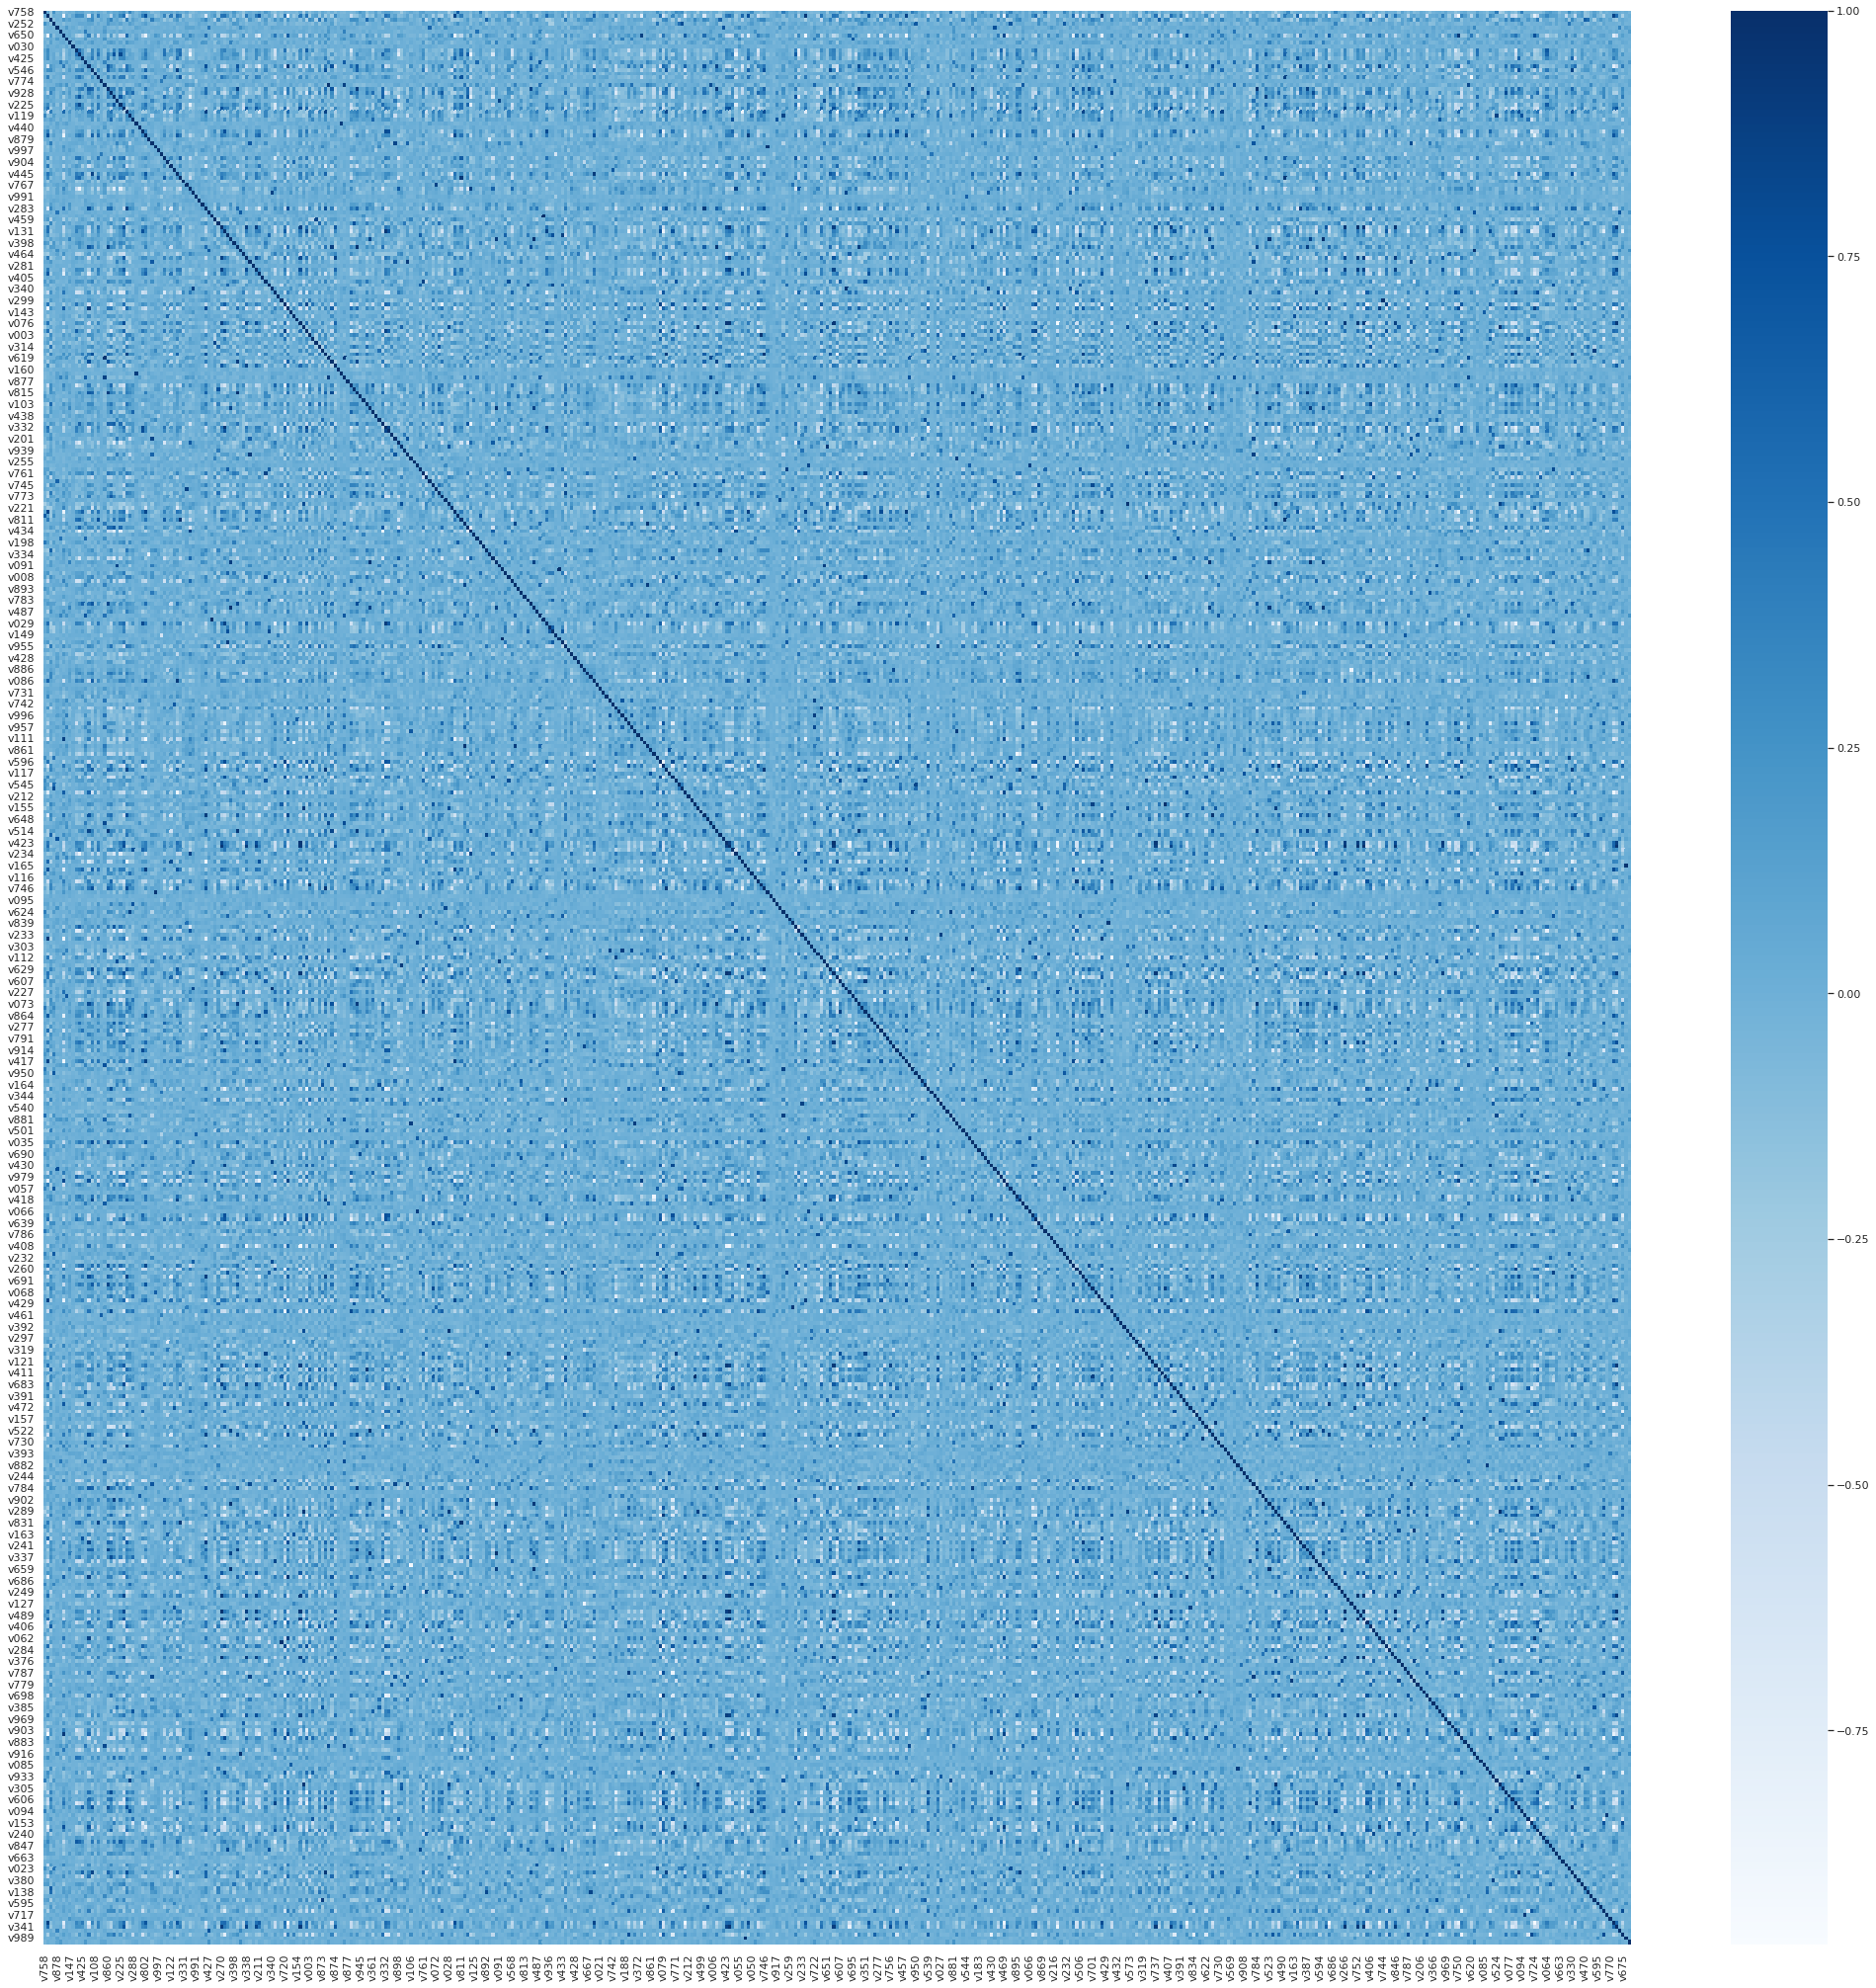

In [9]:
# 特征相关性
df_corr = df_train[set(train_fea_).difference(set(['APPLICATION_ID']))][:1000].corr()
plt.subplots(figsize=(36, 36)) 
sns.heatmap(df_corr, cmap="Blues")

plt.savefig('col_corr_all.png', dpi=500, bbox_inches='tight') 


In [64]:
# 删除关联特征
corr_fea = {}
for col in list(df_corr.columns):
    corr_fea[col] = list(df_corr[col].loc[df_corr[col].between(0.7, 0.99)].index)
retain_fea = []
temp = list(corr_fea.keys())
for k,v in corr_fea.items():
    if v:
        if k in temp:
            retain_fea.append(k)
            temp = set(temp).difference(set(v))
    else:
        retain_fea.append(k)

retain_fea.append('APPLICATION_ID')
df_train = df_train[retain_fea]
df_test = df_test[retain_fea]
print(df_train.shape)


(73500, 284)


In [ ]:
# 去除特征冗余
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=400)
rfe.fit_transform(df_train[df_train.columns.difference(['APPLICATION_ID', 'DEFAULT_LABEL'])], df_train['DEFAULT_LABEL'])
rfe.support_

In [ ]:
# 去冗余特征有效性可视化


## 训练模型

In [65]:
# 载入数据
x_train = df_train.drop(['DEFAULT_LABEL', "APPLICATION_ID"], axis=1)
y_train = df_train['DEFAULT_LABEL']
x_test = df_test.drop(['DEFAULT_LABEL', "APPLICATION_ID"], axis=1)
y_test = df_test['DEFAULT_LABEL']

In [66]:

import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


warnings.filterwarnings('ignore')

# 模型交叉验证
def cv_model(clf, train_x, train_y, test_x, clf_name, seed):
    folds = 5
    kf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=2020)

    train = np.zeros(train_x.shape[0])
    test = np.zeros(test_x.shape[0])

    cv_scores = []

    for i, (train_index, valid_index) in enumerate(kf.split(train_x, train_y)):
        print('************************************ {} ************************************'.format(str(i+1)))
        trn_x, trn_y, val_x, val_y = train_x.iloc[train_index], train_y[train_index], train_x.iloc[valid_index], train_y[valid_index]

        if clf_name == "lgb":
            train_matrix = clf.Dataset(trn_x, label=trn_y)
            valid_matrix = clf.Dataset(val_x, label=val_y)

            params = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'metric': 'auc',
                'learning_rate': 0.1,
                'min_child_weight': 0.32,
                'num_leaves': 14,
                'max_depth': 4,
                'feature_fraction': 0.81,
                'bagging_fraction': 0.61,
                'bagging_freq': 9,
                'min_data_in_leaf': 13,
                'min_split_gain': 0.27,
                'reg_alpha': 9.58,
                'reg_lambda': 4.62,
                'seed': seed,
                'n_jobs':32,
                'verbose': -1,
            }
            model = clf.train(params, train_matrix, 50000, valid_sets=[train_matrix, valid_matrix], verbose_eval=500,early_stopping_rounds=500)
            val_pred = model.predict(val_x, num_iteration=model.best_iteration)
            test_pred = model.predict(test_x, num_iteration=model.best_iteration)
            
            # print(list(sorted(zip(features, model.feature_importance("gain")), key=lambda x: x[1], reverse=True))[:20])
                
        if clf_name == "xgb":
            train_matrix = clf.DMatrix(trn_x , label=trn_y)
            valid_matrix = clf.DMatrix(val_x , label=val_y)
            test_matrix = clf.DMatrix(test_x)
            
            params = {'booster': 'gbtree',
                      'objective': 'binary:logistic',
                      'eval_metric': 'auc',
                      'gamma': 1,
                      'min_child_weight': 1.5,
                      'max_depth': 8, #6
                      'lambda': 10,
                      'subsample': 0.7,
                      'colsample_bytree': 0.7,
                      'colsample_bylevel': 0.7,
                      'eta': 0.04,
                      'tree_method': 'exact',
                      'seed': seed,
                      'nthread': 36,
                      }

                      
            
            watchlist = [(train_matrix, 'train'),(valid_matrix, 'eval')]
            
            model = clf.train(params, train_matrix, num_boost_round=50000, evals=watchlist, verbose_eval=200, early_stopping_rounds=200)
            val_pred  = model.predict(valid_matrix, ntree_limit=model.best_ntree_limit)
            test_pred = model.predict(test_matrix , ntree_limit=model.best_ntree_limit)
            
        if clf_name == "xgb_unbalance":
            train_matrix = clf.DMatrix(trn_x , label=trn_y)
            valid_matrix = clf.DMatrix(val_x , label=val_y)
            test_matrix = clf.DMatrix(test_x)
            params = {'booster': 'gbtree',
                      'objective': 'binary:logistic',
                      'eval_metric': 'auc',
                      'gamma': 1,
                      'min_child_weight': 1.5,
                      'max_depth': 8, #6
                      'lambda': 10,
                      'subsample': 0.7,
                      'colsample_bytree': 0.7,
                      'colsample_bylevel': 0.7,
                      'eta': 0.04,
                      'tree_method': 'exact',
                      'seed': seed,
                      'nthread': 8,
                      "scale_pos_weight": 300,
                      }
            watchlist = [(train_matrix, 'train'),(valid_matrix, 'eval')]
            
            model = clf.train(params, train_matrix, num_boost_round=50000, evals=watchlist, verbose_eval=200, early_stopping_rounds=200)
            val_pred  = model.predict(valid_matrix, ntree_limit=model.best_ntree_limit)
            test_pred = model.predict(test_matrix , ntree_limit=model.best_ntree_limit)

                 
        if clf_name == "cat":
            params = {'learning_rate': 0.05, 'depth': 6, 'l2_leaf_reg': 5, 'logging_level':'Verbose', 'eval_metric':'AUC', 'loss_function':'CrossEntropy','bootstrap_type': 'Bernoulli',
                      'od_type': 'Iter', 'od_wait': 50, 'random_seed': seed, 'allow_writing_files': False}
            

            model = clf(iterations=20000, **params)
            model.fit(trn_x, trn_y, eval_set=(val_x, val_y),
                      cat_features=[], use_best_model=True, verbose=500)
            
            val_pred = model.predict(val_x,prediction_type='Probability')[:,-1]
            test_pred = model.predict(test_x,prediction_type='Probability')[:,-1]
            
            
        train[valid_index] = val_pred
        
        test = test_pred / kf.n_splits
        cv_scores.append(roc_auc_score(val_y, val_pred))
        
        print(cv_scores)
        
    print("%s_scotrainre_list:" % clf_name, cv_scores)
    print("%s_score_mean:" % clf_name, np.mean(cv_scores))
    print("%s_score_std:" % clf_name, np.std(cv_scores))
    return train, test, np.mean(cv_scores)

In [23]:
def lgb_model(x_train, y_train, x_test, seed=2020):
    lgb_train, lgb_test, cv_score = cv_model(lgb, x_train, y_train, x_test, "lgb", seed)
    return lgb_train, lgb_test, cv_score

def xgb_model(x_train, y_train, x_test, seed=2020, unbalance=False):
    if unbalance:
        xgb_train, xgb_test, cv_score = cv_model(xgb, x_train, y_train, x_test, "xgb_unbalance", seed)
    else:
        xgb_train, xgb_test, cv_score = cv_model(xgb, x_train, y_train, x_test, "xgb", seed)
    return xgb_train, xgb_test, cv_score

In [25]:
res_train, res_test, cv_score = lgb_model(x_train, y_train, x_test) #95108

************************************ 1 ************************************
Training until validation scores don't improve for 500 rounds
[500]	training's auc: 0.974199	valid_1's auc: 0.649944
Early stopping, best iteration is:
[51]	training's auc: 0.785424	valid_1's auc: 0.669198
[0.6691977595778318]
************************************ 2 ************************************
Training until validation scores don't improve for 500 rounds
[500]	training's auc: 0.972616	valid_1's auc: 0.638858
Early stopping, best iteration is:
[202]	training's auc: 0.906246	valid_1's auc: 0.654829
[0.6691977595778318, 0.6548293198602398]
************************************ 3 ************************************
Training until validation scores don't improve for 500 rounds
[500]	training's auc: 0.97384	valid_1's auc: 0.630648
Early stopping, best iteration is:
[12]	training's auc: 0.715386	valid_1's auc: 0.655188
[0.6691977595778318, 0.6548293198602398, 0.6551882368047811]
*******************************

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 1543, number of negative: 71957
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.113783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50119
[LightGBM] [Info] Number of data points in the train set: 73500, number of used features: 282
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020993 -> initscore=-3.842340
[LightGBM] [Info] Start training from score -3.842340
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[642]	valid_0's auc: 0.671489
调参后lightgbm单模型在验证集上的AUC：0.6714885726141806


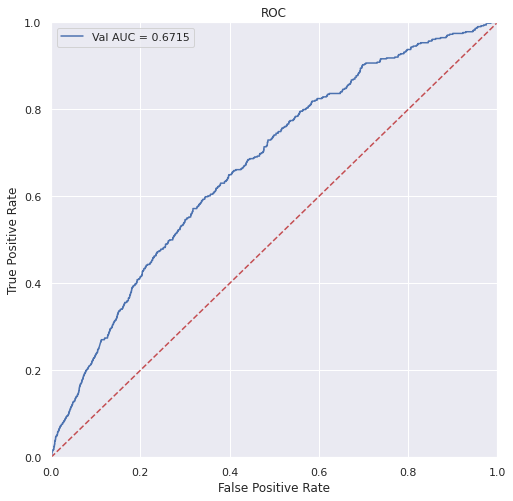

In [67]:
"""
最后训练总的模型
"""
train_matrix = lgb.Dataset(x_train, label=y_train)
valid_matrix = lgb.Dataset(x_test, label=y_test)

base_params_lgb = {
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'learning_rate': 0.01,
                    'num_leaves': 14,
                    'max_depth': 19,
                    'min_data_in_leaf': 37,
                    'min_child_weight':1.6,
                    'bagging_fraction': 0.98,
                    'feature_fraction': 0.69,
                    'bagging_freq': 96,
                    'reg_lambda': 9,
                    'reg_alpha': 7,
                    'min_split_gain': 0.4,
                    'nthread': 8,
                    'seed': 2020,
                    'silent': True,
}

"""使用训练集数据进行模型训练"""
final_model_lgb = lgb.train(base_params_lgb, train_set=train_matrix, valid_sets=valid_matrix, num_boost_round=13000, verbose_eval=1000, early_stopping_rounds=200)

"""预测并计算roc的相关指标"""
val_pre_lgb = final_model_lgb.predict(x_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, val_pre_lgb)
roc_auc = metrics.auc(fpr, tpr)
print('调参后lightgbm单模型在验证集上的AUC：{}'.format(roc_auc))
"""画出roc曲线图"""
plt.figure(figsize=(8, 8))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(loc='best')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()

In [68]:
# sharp可解释性
import shap

explainer = shap.Explainer(final_model_lgb)
shap_values = explainer(x_test)
shap_values = shap_values[:,:,1] # 选择分类1的value
print(x_test.shape,shap_values.shape)



(24500, 282) (24500, 282)


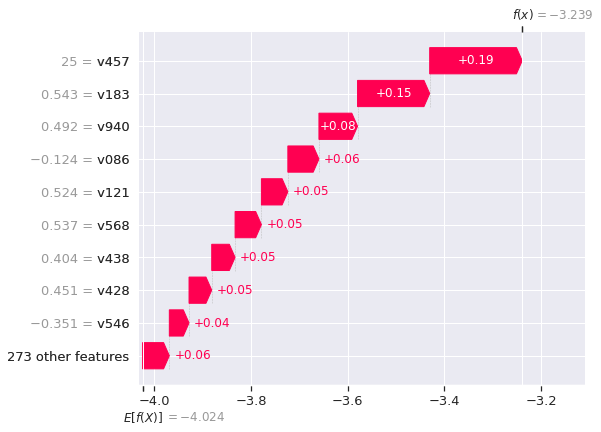

In [69]:
# shap 瀑布图
# 对单个样本预测进行解释
shap.plots.waterfall(shap_values[0])



In [77]:
# 单个样本解释图2
shap.plots.force(shap_values[0])


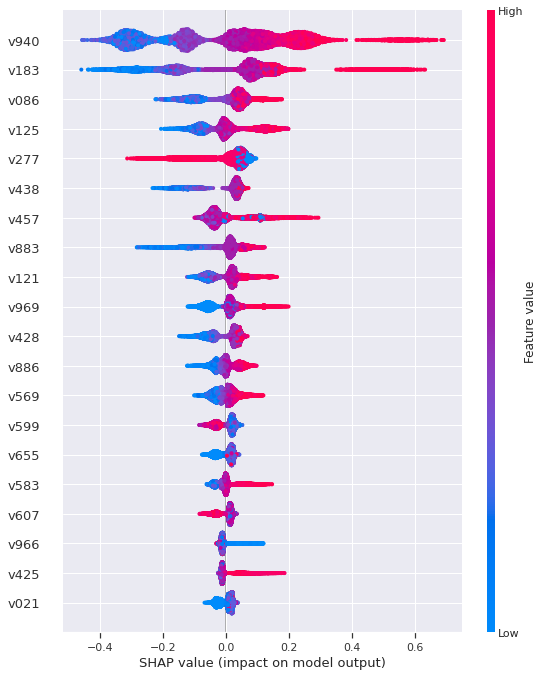

In [71]:
# shap摘要图，对全局特征可视化
shap.summary_plot(shap_values, x_test)


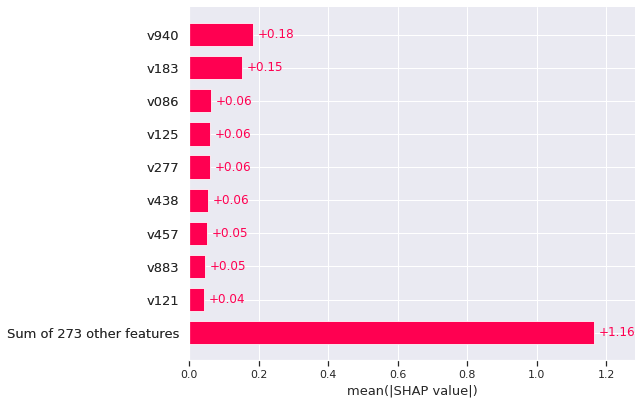

In [72]:
# 全局特征重要性
shap.plots.bar(shap_values)
